In [1]:
from algo import iterative_policy_evaluation, value_iteration, policy_iteration, get_equiproable_policy, get_favorable_policy
from env import Gridworld5x5, ActionGW, JacksCarRental
from utils import plot_cardinal_value_function, plot_cardinal_policy, plot_cardinal_value_and_policy, plot_car_rental_value_and_policy

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

In [2]:
def plot_cache_else_simulate(path, simulate):
    if os.path.exists(path):
        plt.figure(figsize=(10, 5))
        img = mpimg.imread(path)
        plt.imshow(img)
        plt.axis('off') 
        plt.show()
    else:
        simulate()

### 5.1 Implementing dynamic programming algorithms.

Implement the $5 \times 5$ grid-world in Example 3.5 (i.e., implement its dynamics function, to be used in dynamic programming). Implement *iterative policy evaluation* and verify that you obtain the value function for the equiprobable random policy, given in Figure 3.2.

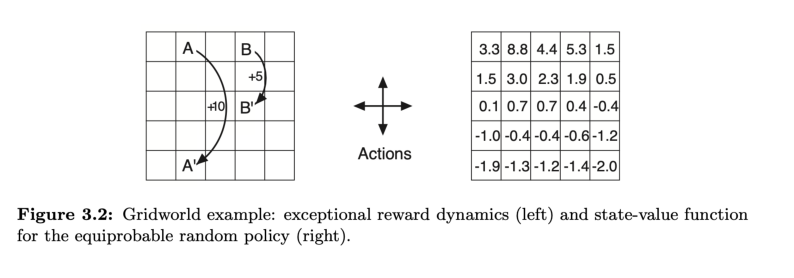

In [3]:
img = mpimg.imread('./assets/fig_32.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off') 
plt.show()

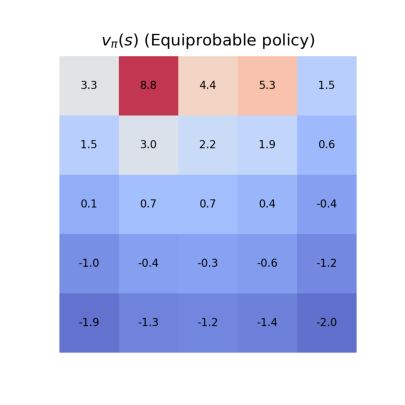

In [4]:
GRID_WORLD_ITERATIVE_POLICY_EVALUATION_PATH = './assets/grid_world_iterative_policy_evaluation.png'

def simulate():
    env = Gridworld5x5()
    V = iterative_policy_evaluation(env, get_equiproable_policy(env, list(ActionGW)), discount_factor=0.9, theta=1e-3)
    fig, ax = plt.subplots(figsize=(10, 10))
    plot_cardinal_value_function(ax, V, title='$v_\pi(s)$ (Equiprobable policy)', save_path=GRID_WORLD_ITERATIVE_POLICY_EVALUATION_PATH)

plot_cache_else_simulate(GRID_WORLD_ITERATIVE_POLICY_EVALUATION_PATH, simulate)

### Implementing Value Iteration

(b) Implement *value iteration* to output both the optimal state-value function and optimal policy for a given MDP (dynamics function). Use your implementation to verify the optimal value function and policy for the $5 \times 5$ grid-world ($v_*$ and $\pi_*$ are given in Figure 3.5).

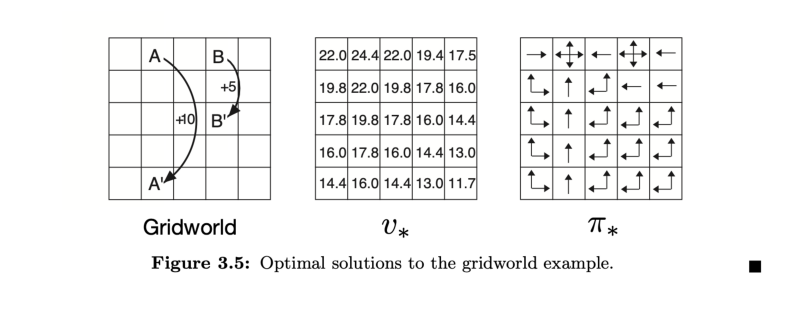

In [5]:
img = mpimg.imread('./assets/fig_35.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off') 
plt.show()

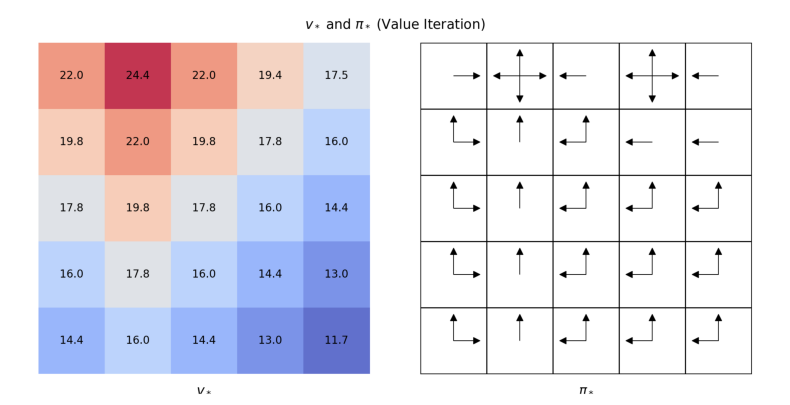

In [6]:
GRID_WORLD_VALUE_ITERATION_PATH = './assets/grid_world_value_iteration.png'

def simulate():
    env = Gridworld5x5()
    V_star, pi_star = value_iteration(env, list(ActionGW), discount_factor=0.9, theta=1e-3)
    plot_cardinal_value_and_policy(V_star, pi_star, title='$v_*$ and $\pi_*$ (Value Iteration)', save_path=GRID_WORLD_VALUE_ITERATION_PATH)

plot_cache_else_simulate(GRID_WORLD_VALUE_ITERATION_PATH, simulate)

### Implementing Policy Iteration

(c) Implement *policy iteration* to output both the optimal state-value function and optimal policy for a given MDP (dynamics function). You should include the fix you proposed in Q2(a). Use your implementation to verify the optimal value function and policy for the $5 \times 5$ grid-world ($v_*$ and $\pi_*$ are given in Figure 3.5). Consider reusing your code from part (a) in policy iteration.

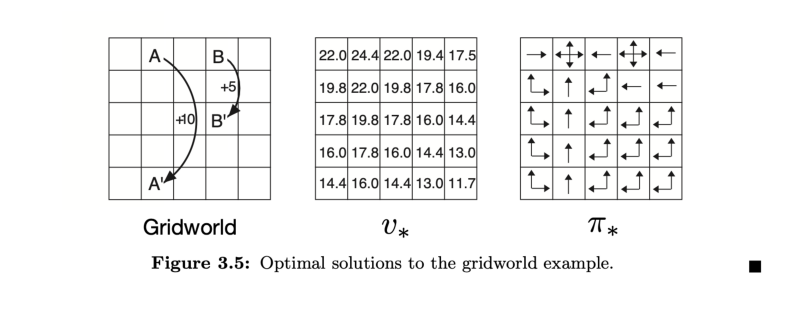

In [7]:
img = mpimg.imread('./assets/fig_35.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off') 
plt.show()

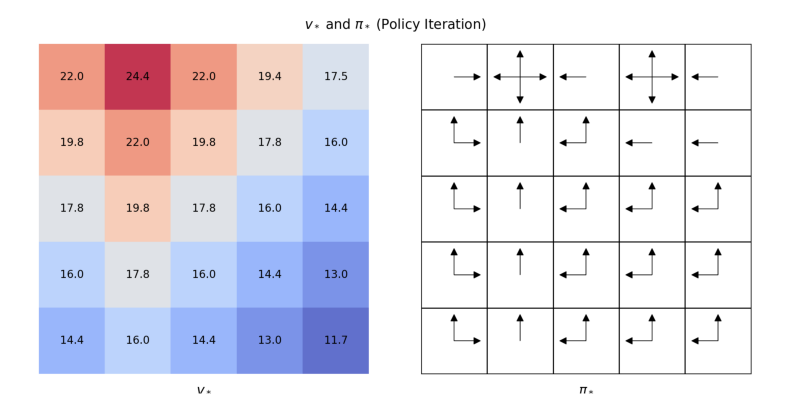

In [8]:
GRID_WORLD_POLICY_ITERATION_PATH = './assets/grid_world_policy_iteration.png'

def simulate():
    env = Gridworld5x5()
    V_star, pi_star = policy_iteration(env, list(ActionGW), discount_factor=0.9, theta=1e-3)
    plot_cardinal_value_and_policy(V_star, pi_star, title='$v_*$ and $\pi_*$ (Policy Iteration)', save_path=GRID_WORLD_POLICY_ITERATION_PATH)

plot_cache_else_simulate(GRID_WORLD_POLICY_ITERATION_PATH, simulate)

### 6 Jack's Car Rental (Unmodified)

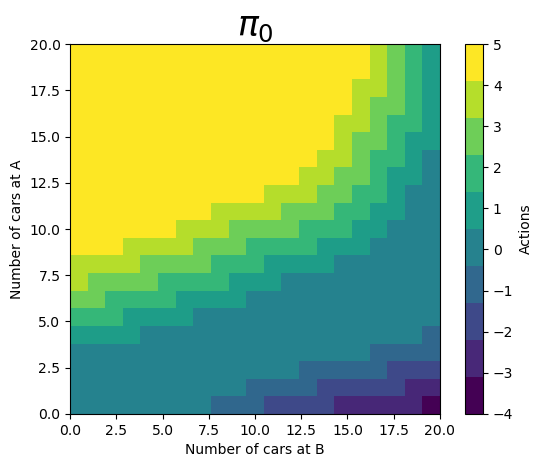

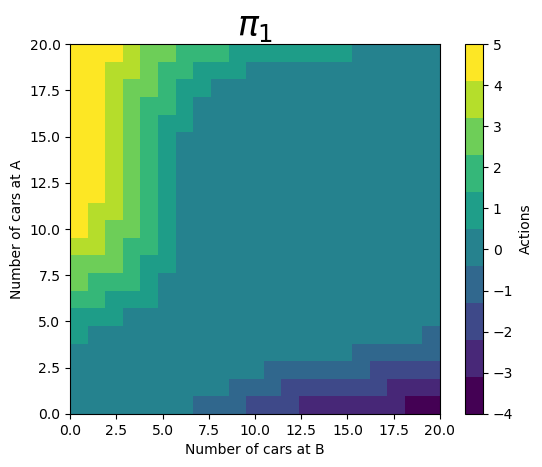

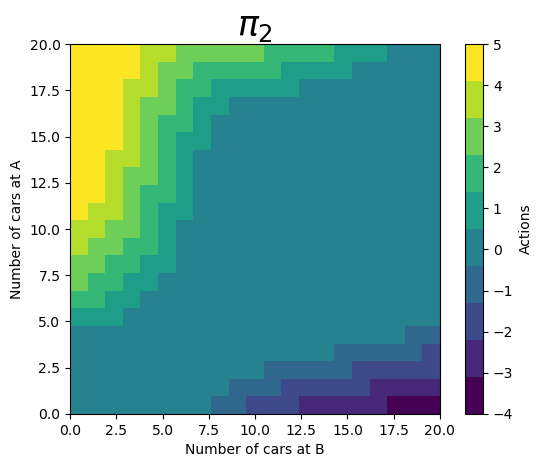

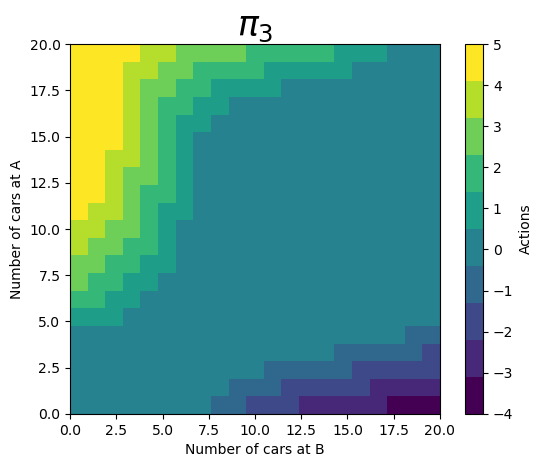

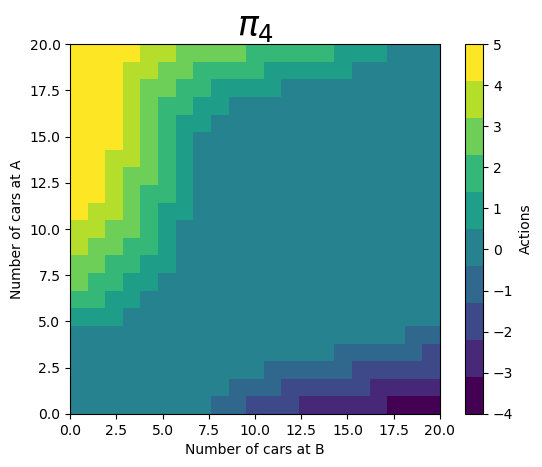

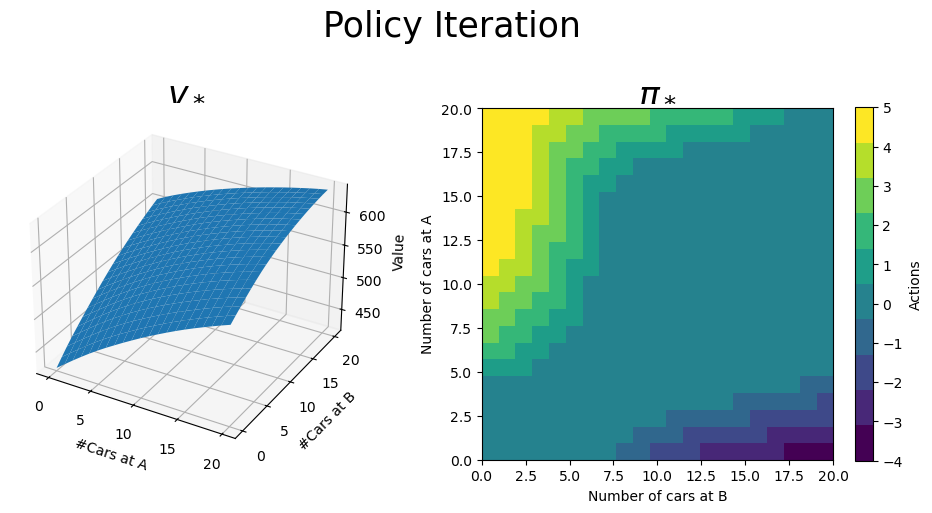

In [9]:
JACK_CAR_RENTAL_BASE_POLICY_ITERATION_PATH = './assets/jack_car_rental_base_policy_iteration.png'

def simulate():
    jack_env = JacksCarRental()
    V_star, pi_star = policy_iteration(jack_env, jack_env.action_space, discount_factor=0.9, theta=1e-3, initial_policy=get_favorable_policy, display=True)
    plot_car_rental_value_and_policy(V_star, pi_star, title="Policy Iteration", value_function_title="$v_*$", policy_title="$\pi_*$", save_path=JACK_CAR_RENTAL_BASE_POLICY_ITERATION_PATH)


plot_cache_else_simulate(JACK_CAR_RENTAL_BASE_POLICY_ITERATION_PATH, simulate)

### Jack's Car Rental (Modified)

If action is positive, then only have to pay for n-1 cars as someone shuttles the cars to the other location for us.

If we start day with more than 10 cars, then we have to pay for the extra cars.

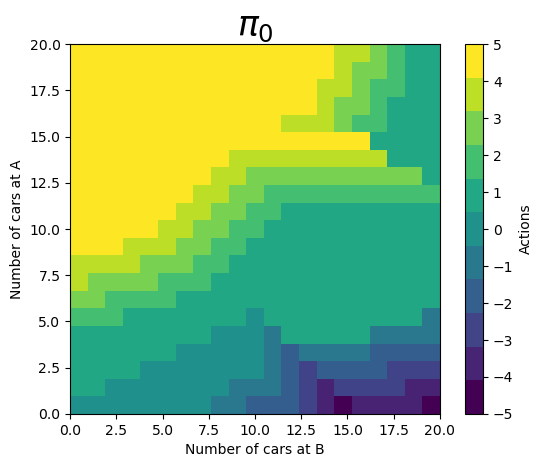

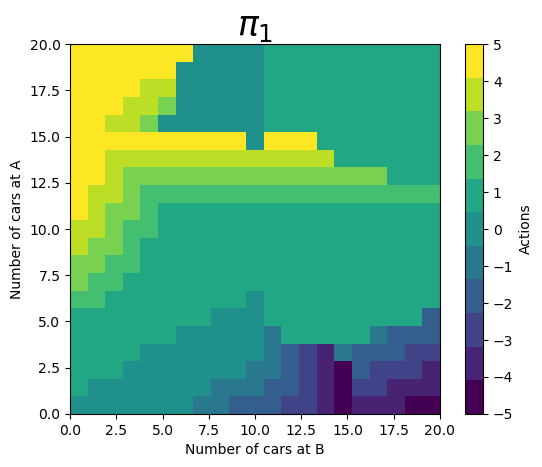

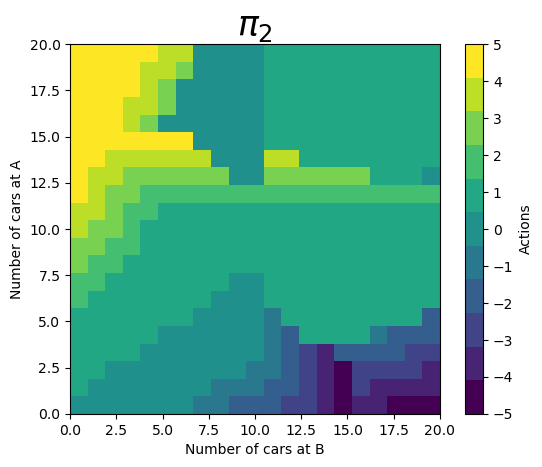

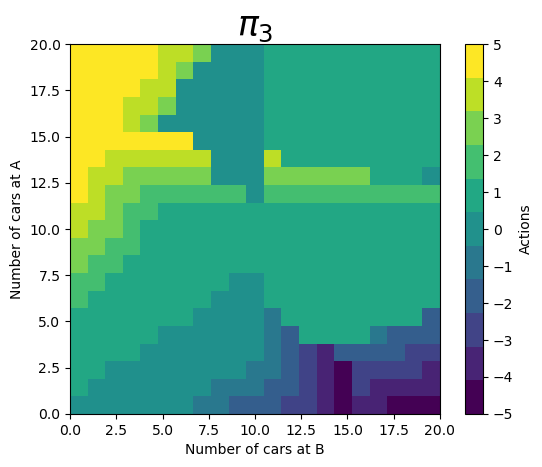

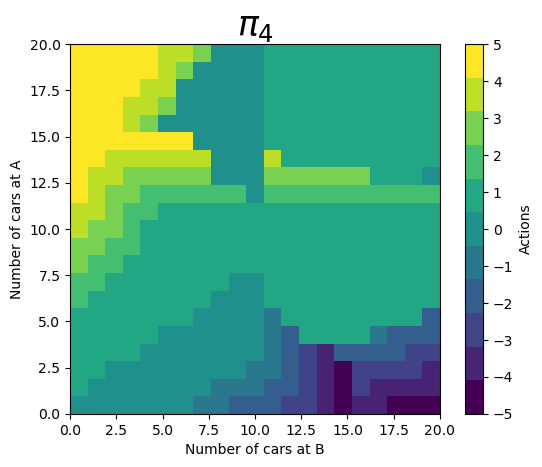

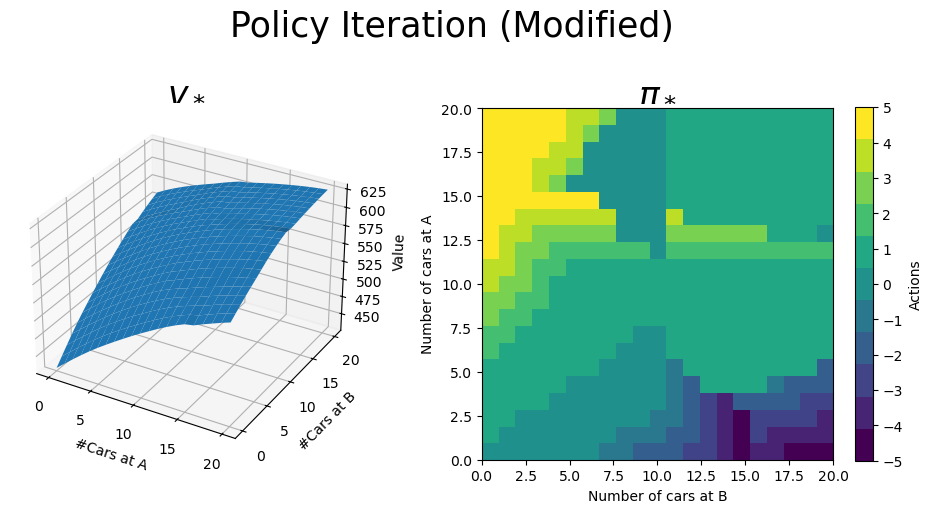

In [10]:
JACK_CAR_RENTAL_MODIFIED_POLICY_ITERATION_PATH = './assets/jack_car_rental_modified_policy_iteration.png'

def simulate():
    jack_env = JacksCarRental(modified=True)
    V_star, pi_star = policy_iteration(jack_env, jack_env.action_space, discount_factor=0.9, theta=1e-3, initial_policy=get_favorable_policy, display=True)
    plot_car_rental_value_and_policy(V_star, pi_star, title="Policy Iteration (Modified)", value_function_title="$v_*$", policy_title="$\pi_*$", save_path=JACK_CAR_RENTAL_MODIFIED_POLICY_ITERATION_PATH)

plot_cache_else_simulate(JACK_CAR_RENTAL_MODIFIED_POLICY_ITERATION_PATH, simulate)